In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<h1>Todennäköisyysjakauma</h1>

Kahden kolikon heitossa tuloksena voi olla ei yhtään, 1 tai 2 klaavaa. Jos kahta kolikkoa heitetään 100 kertaa ja kirjataan muistiin klaavojen lukumäärä kullakin heittokerralla, niin tuloksena voi olla esimerkiksi (tässä suoritan kolikonheiton simuloimalla):

In [2]:
# Arvon nollia ja ykkösiä:
heitot = pd.DataFrame({'kolikko1':np.random.randint(0, 2, 100), 
                       'kolikko2':np.random.randint(0, 2, 100)})

heitot['klaavoja'] = heitot['kolikko1'] + heitot['kolikko2'] 
heitot

,kolikko1,kolikko2,klaavoja
0,0,1,1
1,1,1,2
2,0,1,1
3,1,1,2
4,0,0,0
...,...,...,...
95,0,1,1
96,1,1,2
97,0,1,1
98,0,1,1


Edellisestä voin laskea osuudet klaavojen lukumäärille:

In [3]:
klaavoja = pd.crosstab(heitot['klaavoja'], columns = 'Osuus', normalize = True)
klaavoja.columns.name = ''
klaavoja

,Osuus
klaavoja,
0,0.22
1,0.48
2,0.30


Yllä laskettua klaavojen lukumäärän jakaumaa voidaan kutsua <b>empiiriseksi jakaumaksi</b>. 

Mahdollisia tuloksia kahden kolikon heitossa ovat:
<ul>
<li>'kruunu-kruunu'</li>
<li>'kruunu-klaava'</li> 
<li>'klaava-kruunu'</li>
<li>'klaava-klaava'.</li>
</ul>
    
Koska jokainen tulosvaihtoehto on yhtä todennäköinen, niin voimme päätellä klaavojen lukumäärän <b>teoreettiseksi jakaumaksi</b>:

In [4]:
klaavoja_jakauma = pd.DataFrame([0.25, 0.50, 0.25], index = [0, 1, 2], columns = ['Todennäköisyys'])
klaavoja_jakauma

,Todennäköisyys
0,0.25
1,0.50
2,0.25


Kyseistä jakaumaa voidaan kutsua <b>todennäköisyysjakaumaksi</b>.

Jos kahta kolikkoa heitetään kerta toisensa jälkeen, niin empiirinen jakauma alkaa vääjäämättä lähestyä todennäköisyysjakaumaa. Seuraavassa simuloin kahden kolikon heittoa 10000 kertaa, jolloin jakauma on jo melko lähellä teoreettista todennäköisyysjakaumaa:

In [5]:
heitot2 = pd.DataFrame({'kolikko1':np.random.randint(0, 2, 10000), 
                        'kolikko2':np.random.randint(0, 2, 10000)})

heitot2['klaavoja'] = heitot2['kolikko1'] + heitot2['kolikko2']
klaavoja2 = pd.crosstab(heitot2['klaavoja'], columns = 'Todennäköisyys', normalize = True)
klaavoja2.columns.name = ''
klaavoja2

,Todennäköisyys
klaavoja,
0,0.2451
1,0.5066
2,0.2483


Jos todennäköisyysjakauma ei ole pääteltävissä tai laskettavissa kuten edellä, niin todennäköisyysjakauman approksimaationa voidaan käyttää empiiristä jakaumaa tai todennäköisyysjakauman todennäköisyydet voidaan määrittää asiantuntija-arvioiden pohjalta (subjektiivisina todennäköisyyksinä). 

Esimerkiksi pitkävedossa voi olla yhtenä kohteena ottelu HIFK - HPK. Pitkävedossa veikataan ottelun lopputulosta jaotuksella kotivoitto, tasapeli tai vierasvoitto. Kertoimien määrittämiseksi Veikkaus Oy määrittänee todennäköisyysjakauman lopputulokselle (esimerkiksi kotivoitto 35 %, tasapeli 25 %, vierasvoitto 40 %). Todennäköisyydet pohjautuvat yhtäältä aiemmin pelattuihin peleihin ja toisaalta asiantuntija-arvioihin. 

Todennäköisyysjakaumien yhteydessä käytetään käsitteitä: 

<ul>
    <li><b>satunnaismuuttuja</b>: muuttuja, jonka arvoihin liittyviä todennäköisyyksiä jakauma esittää (esimerkiksi klaavojen lukumäärä)</li>
    <li><b>satunnaisilmiö</b>: tarkastelun kohteena oleva tapahtuma tai ilmiö (esimerkiksi kahden kolikon heitto)</li>
    <li><b>diskreetti todennäköisyysjakauma</b>: satunnaismuuttujan mahdolliset arvot ja niiden todennäköisyydet.</li>
</ul>

<h2>Kertymätodennäköisyys</h2>

Kertymätodennäköisyys tarkoittaa todennäköisyyttä saada korkeintaan tietty satunnaismuuttujan arvo. Kahden nopan heitossa (satunnaisilmiö) silmälukujen summa (satunnaismuuttuja) voi saada arvokseen 2, 3, 4, 5, 6, 7, 8, 9, 10, 11 tai 12. Silmälukujen summan todennäköisyysjakauma selviää seuraavan taulukon avulla:

In [6]:
nopat = pd.DataFrame(index = range(1, 7), columns = range(1, 7))
for i in range(1, 7):
    for j in range(1, 7):
        nopat.loc[i, j] = i + j
nopat

,1,2,3,4,5,6
1,2,3,4,5,6,7
2,3,4,5,6,7,8
3,4,5,6,7,8,9
4,5,6,7,8,9,10
5,6,7,8,9,10,11
6,7,8,9,10,11,12


Taulukon yläreunassa on ensimmäisen nopan silmäluvut ja vasemmassa reunassa toisen nopan silmäluvut. Ruudukon soluihin on laskettu eri tulosvaihtoehtoihin liittyvät silmälukujen summat. Silmälukujen summa 2 voi ruudukon mukaan sattua vain yhdellä tavalla, silmälukujen summa 3 voi sattua kahdella eri tavalla jne. Seuraavaan olen laskenut kuinka monella tavalla kukin silmälukujen summa voi sattua:

In [7]:
nopat2 = pd.DataFrame(index = range(2, 13))
nopat2['Esiintymät'] = 0

for i in range(1, 7):
    for j in range(1, 7):
        nopat2.loc[i + j, 'Esiintymät'] += 1

nopat2['Todennäköisyys'] = nopat2['Esiintymät'] / nopat2['Esiintymät'].sum()
nopat2.index.name = 'Silmälukujen summa'
nopat2

,Esiintymät,Todennäköisyys
Silmälukujen summa,,
2,1,0.027778
3,2,0.055556
4,3,0.083333
5,4,0.111111
6,5,0.138889
7,6,0.166667
8,5,0.138889
9,4,0.111111
10,3,0.083333


Jakauman havainnollistaminen pylväskaaviona:

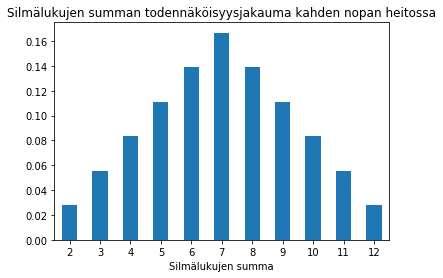

In [8]:
nopat2['Todennäköisyys'].plot.bar(title = 'Silmälukujen summan todennäköisyysjakauma kahden nopan heitossa', 
                                  rot = 0)

Kertymätodennäköisyys voidaan laskea satunnaismuuttujan arvon ja kaikkien sitä edeltävien satunnaismuuttujan arvojen todennäköisyyksien summana. Ketymätodennäköisyydestä nähdään todennäköisyys saada korkeintaan tietyn suuruinen arvo. 

In [9]:
nopat2['Kertymätodennäköisyys'] = nopat2['Todennäköisyys'].cumsum()
nopat2

,Esiintymät,Todennäköisyys,Kertymätodennäköisyys
Silmälukujen summa,,,
2,1,0.027778,0.027778
3,2,0.055556,0.083333
4,3,0.083333,0.166667
5,4,0.111111,0.277778
6,5,0.138889,0.416667
7,6,0.166667,0.583333
8,5,0.138889,0.722222
9,4,0.111111,0.833333
10,3,0.083333,0.916667


Kertymätodennäköisyydet ovat keskeisessä asemassa todennäköisyysjakaumia käytettäessä. Eri jakaumien kertymätodennäköisyyksiä löytyy tilastotieteen kirjoista taulukoituna tai niitä voidaan laskea esimerkiksi Pythonin tai taulukkolaskennan funktioilla. Tämän vuoksi onkin syytä harjoitella erilaisten tapahtumien todennäköisyyksien laskemista kertymätodennäköisyyksien avulla. 

Edellä kuvatussa kahden nopan silmälukujen jakaumassa:

In [10]:
print('P(X < 7) = ', nopat2.loc[6, 'Kertymätodennäköisyys'])
print('P(X > 9) = ', 1 - nopat2.loc[9, 'Kertymätodennäköisyys'])
print('P(4 < X < 9) = ', nopat2.loc[8, 'Kertymätodennäköisyys'] - nopat2.loc[4, 'Kertymätodennäköisyys'])

P(X < 7) =  0.4166666666666667
P(X > 9) =  0.16666666666666652
P(4 < X < 9) =  0.5555555555555557


<h2>Odotusarvo</h2>

Empiiriselle jakaumalle voidaan laskea keskiarvo. Palataan aiempaan esimerkkiin, jossa simuloitiin kahden kolikon heittoa 100 kertaa. Keskiarvoksi saan:

In [11]:
print('Klaavojen lukumäärän keskiarvo: ', (klaavoja.index * klaavoja['Osuus']).sum())

Klaavojen lukumäärän keskiarvo:  1.08


Voimme myös määrittää keskiarvon eli odotusarvon todennäköisyysjakaumalle. Jos todennäköisyysjakauma tunnetaan, niin odotusarvo on satunnaismuuttujan arvojen todennäköisyyksillä painotettu summa. 

Kahden kolikon heitossa klaavojen lukumäärän todennäköisyyksillä painotettu summa:

In [12]:
print('Klaavojen lukumäärän odotusarvo: ', (klaavoja_jakauma.index * klaavoja_jakauma['Todennäköisyys']).sum())

Klaavojen lukumäärän odotusarvo:  1.0


Odotusarvot ovat keskeisiä monissa sovelluksissa. Esimerkiksi vakuutusyhtiöt ovat kiinnostuneita tulevan vuoden vakuutuskorvausten odotusarvoista eri vakuutustyyppien kohdalla, sijoittajat ovat kiinnostuneita sijoitusten tuottojen odotusarvoista ja kauppiaat ovat kiinnostuneita tuotteiden kysynnän odotusarvoista.

Esimerkki. Suunnitelmissa olevan investoinnin osalta arvioidaan:
<ul>
    <li>investoinnin kustannukset ovat seuraavan 10 vuoden aikana 100 000 euroa vuodessa</li>
    <li>korkeasuhdanteessa saadaan tuottoja noin 180 000 euroa vuodessa</li>
    <li>matalasuhdanteessa saadaan tuottoja 110 000 euroa vuodessa</li>
    <li>korkeasuhdanteen todennäköisyys on tilastojen mukaan 0,40 ja matalasuhdanteen 0,60</li>
</ul>
Tietojen pohjalta voimme laskea investoinnin vuosituoton odotusarvon:

In [13]:
0.40 * 180000 + 0.60 * 110000

138000.0

Tuoton odotusarvon avulla voidaan sitten arvioida onko investointi riittävän kannattava.

Esimerkki. Arpajaisissa on 1000 arpaa. Voittoarpoja on 31:
<ul>
    <li>500 euron voittoja on yksi</li>
    <li>300 euron voittoja on 10</li>
    <li>100 euron voittoja on 20.</li>
</ul>
Määritä arvan hinta siten, että voiton odotusarvo on 55 % arvan hinnasta.

Lasketaan voiton odotusarvo:

In [14]:
1/1000*500 + 10/1000*300 + 20/1000*100

5.5

Jotta voiton odotusarvo 5,50 euroa olisi 55 % arvan hinnasta, täytyy arvan hinnaksi asettaa 10 euroa.

Esimerkki. Maahantuojalla on tilasto (perustuen aiemmin tehtyihin korjauksiin) automalliin takuuaikana tehtävistä korjauksista:
<ul>
    <li>50 % autoista ei tarvitse tehdä takuun piiriin kuuluvia korjauksia</li>
    <li>20 % autoista joudutaan tekemään keskimäärin 150 euroa maksavat korjaukset</li>
    <li>25 % keskimäärin 400 euroa maksavat korjaukset</li>
    <li>loppuihin 600 euroa maksavat korjaukset.</li>
</ul>
Tietojen pohjalta voidaan määrittää, kuinka paljon takuun pitäisi lisätä uuden auton hintaa. Riittää, kun laskemme korjauksiin kuluvan euromäärän odotusarvon:

In [15]:
0.50*0 + 0.20*150 + 0.25*400 + 0.05*600 

160.0

Esimerkki. Vakuutusyhtiöissä hyödynnetään laajasti erilaisiin ilmiöihin liittyviä odotusarvoja vakuutuksia hinnoiteltaessa. Tarkastellaan esimerkkinä yksinkertaista ulkoilmatapahtuman järjestäjälle myönnettävää sadevakuutusta. Ulkoilmatapahtuman järjestäjä ottaa tällaisen vakuutuksen lieventääkseen mahdollisen sateen aiheuttamia tappioita. Kiinnekohta, jonka perusteella vakuutus voidaan hinnoitella, on kyseisen ajankohdan sateen todennäköisyysjakauma:

In [16]:
sade = pd.DataFrame({'Sade mm': ['0-2', '3-5', '6-10', '11-'],
                     'Todennäköisyys': [0.53, 0.3, 0.15, 0.02], 
                     'Korvaus': [0, 500, 1000, 3000]})
sade

,Sade mm,Todennäköisyys,Korvaus
0,0-2,0.53,0
1,3-5,0.30,500
2,6-10,0.15,1000
3,11-,0.02,3000


In [17]:
print('Korvauksen odotusarvo: ', (sade['Todennäköisyys'] * sade['Korvaus']).sum())

Korvauksen odotusarvo:  360.0
